In [1]:
import sys;sys.path.append('../')
import os
import pandas as pd
import numpy as np
from model_lgbm_71 import model
from matplotlib import pyplot as plt

/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
m = model('example')


init model example


In [3]:
market_test_df = pd.read_csv("../../data/market_train_df_head.csv").drop('Unnamed: 0', axis=1)

In [4]:
day1 = market_test_df['time'].unique()[1]
day2 = market_test_df['time'].unique()[2]
day3 = market_test_df['time'].unique()[3]

In [5]:
test_X = market_test_df

In [6]:
day1_codes = test_X[test_X['time'] == day1]['assetCode'].unique()
print(len(day1_codes))
day2_codes = test_X[test_X['time'] == day2]['assetCode'].unique()
print(len(day2_codes))
day3_codes = test_X[test_X['time'] == day3]['assetCode'].unique()
print(len(day3_codes))

1423
1428
1430


In [7]:
labels_len = []
for i in range(len(market_test_df['time'].unique())):
    dayi = market_test_df['time'].unique()[i]
    dayi_codes = test_X[test_X['time'] == dayi]['assetCode'].unique()
    labels_len.append(len(dayi_codes))

[<matplotlib.lines.Line2D at 0x103493400>]

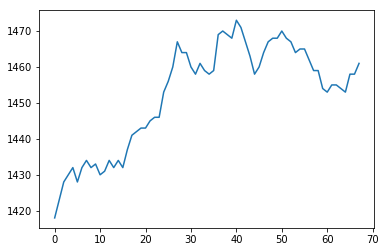

In [8]:
plt.plot(labels_len[:-1])

[<matplotlib.lines.Line2D at 0x10419ec18>]

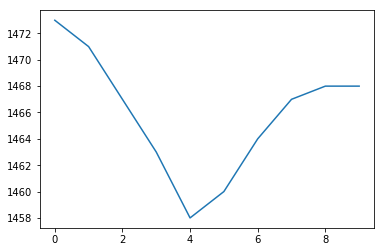

In [9]:
plt.plot(labels_len[40:50])

In [10]:
day40 = market_test_df['time'].unique()[40]
x_train = market_test_df[market_test_df['time'] <= day40]

In [11]:
complete_features = m._generate_features(x_train, None, verbose=True, normalize=False)

Starting features generation for model example, Fri Jan  4 22:05:41 2019
['A.N' 'AAI.N' 'AAP.N' ... 'SVR.N' 'TDS.A' 'VTIV.O']
total 1582 df
Finished features generation for model example, TIME 25.725871086120605


In [13]:
len(m.assetCode_mapping)

1582

In [14]:
day44 = market_test_df['time'].unique()[44]
x_test = market_test_df[market_test_df['time'] == day44]

In [15]:
test_features = m._generate_features(x_test, None, verbose=True, normalize=False)

Starting features generation for model example, Fri Jan  4 22:07:19 2019
['A.N' 'AAI.N' 'AAP.N' ... 'ZRAN.O' 'ZUMZ.O' 'ZZ.N']
total 1458 df
Finished features generation for model example, TIME 19.035757064819336


In [32]:
train_mapping_df = pd.DataFrame({'assetCode':x_train['assetCode'].reset_index(drop=True),'mappedTo':complete_features['assetCodeT']})

In [42]:
list(train_mapping_df[train_mapping_df['assetCode'] == 'ABG.N']['mappedTo'])

[1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437]

In [37]:
test_mapping_df = pd.DataFrame({'assetCode':x_test['assetCode'].reset_index(drop=True),'mappedTo':test_features['assetCodeT']})

In [40]:
test_mapping_df[test_mapping_df['assetCode'] == 'ABG.N']['mappedTo']

8    1437.0
Name: mappedTo, dtype: float64

In [43]:
list(test_mapping_df['assetCode'])

['A.N',
 'AAI.N',
 'AAP.N',
 'AAPL.O',
 'AB.N',
 'ABB.N',
 'ABC.N',
 'ABD.N',
 'ABG.N',
 'ABM.N',
 'ABT.N',
 'ABV.N',
 'ABY.N',
 'ACF.N',
 'ACH.N',
 'ACL.N',
 'ACS.N',
 'ACTS.O',
 'ACXM.O',
 'ADBE.O',
 'ADCT.O',
 'ADI.N',
 'ADM.N',
 'ADP.N',
 'ADS.N',
 'ADSK.O',
 'ADTN.O',
 'AEA.N',
 'AEE.N',
 'AEG.N',
 'AEIS.O',
 'AEL.N',
 'AEO.N',
 'AEP.N',
 'AES.N',
 'AET.N',
 'AF.N',
 'AFFX.O',
 'AFG.N',
 'AFL.N',
 'AFR.N',
 'AG.N',
 'AGE.N',
 'AGN.N',
 'AGU.N',
 'AGYS.O',
 'AH.N',
 'AHG.N',
 'AHL.N',
 'AHS.N',
 'AHT.N',
 'AINV.O',
 'AIR.N',
 'AIT.N',
 'AIV.N',
 'AIZ.N',
 'AJG.N',
 'AKAM.O',
 'AKR.N',
 'AKS.N',
 'ALB.N',
 'ALD.N',
 'ALGN.O',
 'ALJ.N',
 'ALK.N',
 'ALL.N',
 'ALNY.O',
 'ALO.N',
 'ALTR.O',
 'ALU.N',
 'ALV.N',
 'ALXN.O',
 'AMAT.O',
 'AMD.N',
 'AME.N',
 'AMG.N',
 'AMGN.O',
 'AMIS.O',
 'AMKR.O',
 'AMLN.O',
 'AMMD.O',
 'AMP.N',
 'AMT.N',
 'AMTD.O',
 'AMX.N',
 'AMZN.O',
 'AN.N',
 'ANDE.O',
 'ANDW.O',
 'ANF.N',
 'ANR.N',
 'AOC.N',
 'AOS.N',
 'APA.N',
 'APC.N',
 'APD.N',
 'APH.N',
 'APOL.O',
 'APPB.O',
 'AQNT.O',
 'ARAY.O',
 'ARBA.O',
 'ARCC.O',
 'ARD.N',
 'ARE.N',
 'ARG.N',
 'ARW.N',
 'ARXT.O',
 'ARXX.O',
 'ASBC.O',
 'ASCA.O',
 'ASH.N',
 'ASN.N',
 'ASPV.O',
 'ASX.N',
 'AT.N',
 'ATHR.O',
 'ATI.N',
 'ATMI.O',
 'ATML.O',
 'ATO.N',
 'ATPG.O',
 'ATU.N',
 'ATW.N',
 'AU.N',
 'AUO.N',
 'AUY.N',
 'AV.N',
 'AVA.N',
 'AVB.N',
 'AVCT.O',
 'AVP.N',
 'AVT.N',
 'AVX.N',
 'AVY.N',
 'AW.N',
 'AXE.N',
 'AXL.N',
 'AXP.N',
 'AXS.N',
 'AYE.N',
 'AYI.N',
 'AZN.N',
 'AZO.N',
 'AZPN.O',
 'B.N',
 'BA.N',
 'BAC.N',
 'BAK.N',
 'BAP.N',
 'BAX.N',
 'BBBY.O',
 'BBD.N',
 'BBT.N',
 'BBV.N',
 'BBY.N',
 'BC.N',
 'BCE.N',
 'BCO.N',
 'BCR.N',
 'BCS.N',
 'BDC.N',
 'BDK.N',
 'BDN.N',
 'BDX.N',
 'BEAS.O',
 'BEAV.O',
 'BEC.N',
 'BECN.O',
 'BEE.N',
 'BEN.N',
 'BER.N',
 'BEZ.N',
 'BFb.N',
 'BG.N',
 'BGC.N',
 'BGG.N',
 'BGP.N',
 'BHE.N',
 'BHI.N',
 'BHP.N',
 'BHS.N',
 'BID.N',
 'BIDU.O',
 'BIG.N',
 'BIIB.O',
 'BJ.N',
 'BJS.N',
 'BK.N',
 'BKC.N',
 'BKH.N',
 'BKS.N',
 'BLC.N',
 'BLK.N',
 'BLL.N',
 'BLUD.O',
 'BMA.N',
 'BMC.N',
 'BMET.O',
 'BMR.N',
 'BMRN.O',
 'BMS.N',
 'BMY.N',
 'BNI.N',
 'BOBE.O',
 'BOBJ.O',
 'BOL.N',
 'BOT.N',
 'BOW.N',
 'BP.N',
 'BRC.N',
 'BRCM.O',
 'BRE.N',
 'BRKL.O',
 'BRKR.O',
 'BRKS.O',
 'BRL.N',
 'BRO.N',
 'BRY.N',
 'BSC.N',
 'BSG.N',
 'BSX.N',
 'BUCY.O',
 'BUD.N',
 'BVN.N',
 'BWA.N',
 'BWS.N',
 'BXP.N',
 'BYD.N',
 'CA.N',
 'CAB.N',
 'CAG.N',
 'CAH.N',
 'CAI.N',
 'CAJ.N',
 'CAL.N',
 'CAM.N',
 'CAR.N',
 'CAT.N',
 'CB.N',
 'CBD.N',
 'CBEY.O',
 'CBH.N',
 'CBI.N',
 'CBK.N',
 'CBL.N',
 'CBM.N',
 'CBS.N',
 'CBSS.O',
 'CBST.O',
 'CBT.N',
 'CC.N',
 'CCBL.O',
 'CCJ.N',
 'CCK.N',
 'CCL.N',
 'CCOI.O',
 'CCU.N',
 'CDNS.O',
 'CDWC.O',
 'CE.N',
 'CEC.N',
 'CECO.O',
 'CEDC.O',
 'CEG.N',
 'CEI.N',
 'CELG.O',
 'CEN.N',
 'CENX.O',
 'CEO.N',
 'CEPH.O',
 'CERN.O',
 'CF.N',
 'CFC.N',
 'CFR.N',
 'CG.N',
 'CHAP.O',
 'CHD.N',
 'CHE.N',
 'CHH.N',
 'CHIC.O',
 'CHK.N',
 'CHKP.O',
 'CHL.N',
 'CHRW.O',
 'CHS.N',
 'CHTT.O',
 'CHU.N',
 'CI.N',
 'CIB.N',
 'CIEN.O',
 'CIG.N',
 'CINF.O',
 'CKFR.O',
 'CKR.N',
 'CL.N',
 'CLC.N',
 'CLE.N',
 'CLI.N',
 'CLP.N',
 'CLS.N',
 'CLX.N',
 'CMA.N',
 'CMC.N',
 'CMCSA.O',
 'CMCSK.O',
 'CMG.N',
 'CMI.N',
 'CMP.N',
 'CMS.N',
 'CMVT.OQ',
 'CNA.N',
 'CNC.N',
 'CNE.N',
 'CNET.O',
 'CNH.N',
 'CNI.N',
 'CNL.N',
 'CNP.N',
 'CNQ.N',
 'CNW.N',
 'COCO.O',
 'COF.N',
 'COG.N',
 'COGN.O',
 'COGT.O',
 'COH.N',
 'COL.N',
 'COMS.O',
 'COO.N',
 'COP.N',
 'COST.O',
 'CP.N',
 'CPA.N',
 'CPB.N',
 'CPRT.O',
 'CPS.N',
 'CPT.N',
 'CPWR.O',
 'CPX.N',
 'CR.N',
 'CRA.N',
 'CRDN.O',
 'CREE.O',
 'CRI.N',
 'CRL.N',
 'CRM.N',
 'CROX.O',
 'CRR.N',
 'CRS.N',
 'CRUS.O',
 'CRZO.O',
 'CS.N',
 'CSCO.O',
 'CSE.N',
 'CSGS.O',
 'CSH.N',
 'CSX.N',
 'CTAS.O',
 'CTB.N',
 'CTCM.O',
 'CTL.N',
 'CTSH.O',
 'CTV.N',
 'CTX.N',
 'CTXS.O',
 'CUZ.N',
 'CVA.N',
 'CVC.N',
 'CVD.N',
 'CVG.N',
 'CVH.N',
 'CVS.N',
 'CVX.N',
 'CW.N',
 'CX.N',
 'CXG.N',
 'CY.N',
 'CYH.N',
 'CYMI.O',
 'CYN.N',
 'CYT.N',
 'CYTC.O',
 'D.N',
 'DADE.O',
 'DAKT.O',
 'DB.N',
 'DBD.N',
 'DCEL.O',
 'DCI.N',
 'DD.N',
 'DDS.N',
 'DE.N'